<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/neural-network-course/03_keras/05_tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Callbacks - wywołania zwrotne

1. [Budowa sieci neuronowej](#a0)
2. [Trenowanie modelu - Tensorflow](#a1)
2. [Tensorboard Dev](#a2)




Klasyfikator wieloklasowy - Digit Recognition

In [1]:
# ######################################################
# Etap 7. Odcinek: Tensorboard Dev.

%tensorflow_version 2.x  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.4.1


Załadowanie i przygotowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [4]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

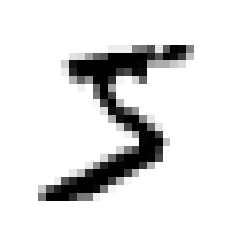

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

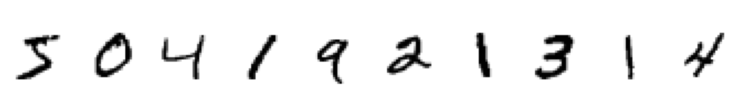

In [7]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a0'></a> Budowa sieci neuronowej

In [9]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation='softmax'))

    # było optimizers ale błąd
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a1'></a> Trenowanie modelu - Tensorboard

In [10]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime as dt

!rm -rf ./logs
log_dir = 'logs/fit/' + dt.now().strftime('%Y%m%d-%H%M%S')
tensorboard = TensorBoard(log_dir=log_dir)

In [11]:
model = build_model()
# callbacks ustawiam na tensorboard aby logi były zapisane w tym pliku
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2, batch_size=32, callbacks=[tensorboard])

Epoch 1/8
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5318 - accuracy: 0.8453 - val_loss: 0.1557 - val_accuracy: 0.9554
Epoch 2/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1593 - accuracy: 0.9526 - val_loss: 0.1073 - val_accuracy: 0.9684
Epoch 3/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.0976 - val_accuracy: 0.9727
Epoch 4/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0929 - accuracy: 0.9713 - val_loss: 0.0900 - val_accuracy: 0.9721
Epoch 5/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0797 - accuracy: 0.9740 - val_loss: 0.0797 - val_accuracy: 0.9761
Epoch 6/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0690 - accuracy: 0.9785 - val_loss: 0.0931 - val_accuracy: 0.9728
Epoch 7/8
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0595 - accuracy: 0.9808 - val_loss: 0.0785 - val_accuracy: 0.9768

In [12]:
# w ten sposób mamy tensorboard w przeglądarce, ale tym razem tak nie chcemy

# %load_ext tensorboard
# %tensorboard --logdir logs/fit

### <a name='a2'></a> Tensorboard Dev

In [13]:
# załadowuje rozszerzenie tensorboard
%load_ext tensorboard

In [ ]:
# trzeba się zgodzić że adres dostępny dla wszystkich, wejść na google i skopiować kod
!tensorboard dev upload --logdir logs

2021-02-12 17:17:00.286261: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scop